# Analysing reviews of Emirates Airline on SKYTRAX 

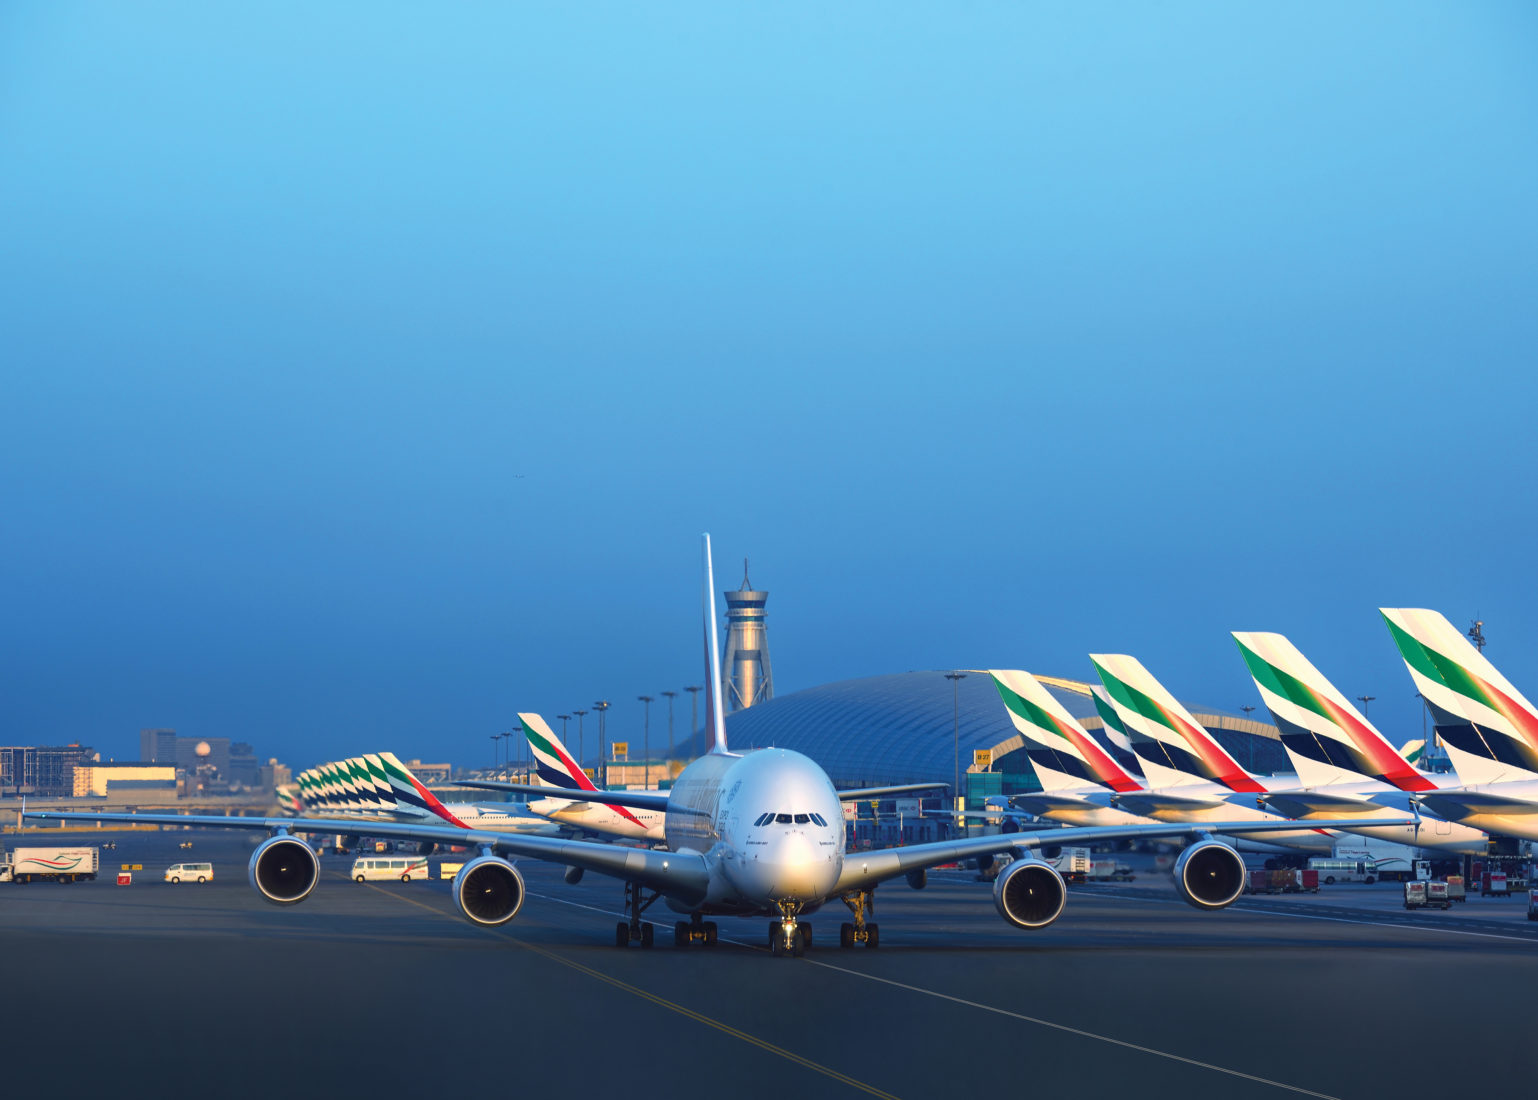

# Project Overview
In this project, we are going to scrape Emirates reviews of Skytrax. Then, we are going to do some data exploration, generate WordClouds, perform sentiment analysis and create an LDA topic model.

# Problem Statement
The project goal is to use text analytics and Natural Language Processing (NLP) to extract actionable insights from the reviews and help the airline improve their satisfaction rate.

# Methodologies

(1) Web Scraping

The airline reviews will be scraped from Skytrax by using requests with BeautifulSoup. The detailed steps are covered in the next section.

(2) Exploratory Data Analysis (EDA)

We will use pie chart, histogram, and seaborn violin plot to get a better understanding of the reviews and ratings data.

(3) WordClouds

In order to generate more meaningful WordClouds, we will customize some extra stop words and use lemmatization to remove closely redundant words.

(4) Sentiment Analysis ("Sentiment analysis British Airway")

The sentiment analysis helps to classify the polarity and subjectivity of the overall reviews and determine whether the expressed opinion in the reviews is mostly positive, negative, or neutral.

https://www.airlinequality.com/airline-reviews/emirates

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from string import digits
import nltk
nltk.download()
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kater\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
base_url = "https://www.airlinequality.com/airline-reviews/emirates"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1


C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

   ---> 100 total reviews
Scraping page 2


C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

   ---> 200 total reviews
Scraping page 3


C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

   ---> 300 total reviews
Scraping page 4


C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

   ---> 400 total reviews
Scraping page 5


C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

   ---> 500 total reviews
Scraping page 6


C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

   ---> 600 total reviews
Scraping page 7


C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

   ---> 700 total reviews
Scraping page 8


C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

   ---> 800 total reviews
Scraping page 9


C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

   ---> 900 total reviews
Scraping page 10


C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

   ---> 1000 total reviews


C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\kater\AppData\Local\Temp\ipykernel_17036\1789267911.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [8]:
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Ground Service,Value For Money,Recommended,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Aircraft,Wifi & Connectivity,reviews
0,Solo Leisure,Economy Class,Cochin to Auckland via Dubai,May 2023,1.0,1.0,3,no,NaN,NaN,NaN,NaN,NaN,✅ Trip Verified | My wife travelled on 6th ma...
1,Solo Leisure,Economy Class,Mumbai to Houston via Dubai,March 2023,4.0,1.0,1,no,4.0,3.0,4.0,NaN,NaN,✅ Trip Verified | Emirates has been the worst ...
2,Solo Leisure,Economy Class,Newcastle to Dubai,May 2023,5.0,5.0,1,yes,2.0,1.0,5.0,NaN,NaN,✅ Trip Verified | Very disappointed when I ap...
3,Family Leisure,Economy Class,Dubai to Tel Aviv,May 2023,1.0,2.0,1,no,1.0,1.0,2.0,Boeing 777/300,1.0,✅ Trip Verified | Flight crew prevented passe...
4,Couple Leisure,Economy Class,Dubai to Singapore,April 2023,1.0,4.0,3,no,1.0,1.0,5.0,A380,1.0,✅ Trip Verified | The quality is super too lo...


In [ ]:
df.to_csv("Emirates_review.csv", index=False)

In [ ]:
df.columns

# Data Cleaning

In [5]:
df = pd.read_csv('Emirates_review.csv')

In [6]:
df.shape

(1000, 14)

In [7]:
#removing '✅ Trip Verified |', 'Not Verified |'

df["reviews"] = df["reviews"].str.replace("✅ Trip Verified ", "")
df["reviews"] = df["reviews"].str.replace("Not Verified ", "")
df["reviews"] = df["reviews"].str.replace("|", "")

C:\Users\kater\AppData\Local\Temp\ipykernel_2916\1859901526.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["reviews"] = df["reviews"].str.replace("|", "")


In [8]:
df.head(3)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Ground Service,Value For Money,Recommended,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Aircraft,Wifi & Connectivity,reviews
0,Solo Leisure,Economy Class,Cochin to Auckland via Dubai,May 2023,1.0,1.0,3,no,NaN,NaN,NaN,NaN,NaN,My wife travelled on 6th may to Cochin to Au...
1,Solo Leisure,Economy Class,Mumbai to Houston via Dubai,March 2023,4.0,1.0,1,no,4.0,3.0,4.0,NaN,NaN,Emirates has been the worst airline to deal w...
2,Solo Leisure,Economy Class,Newcastle to Dubai,May 2023,5.0,5.0,1,yes,2.0,1.0,5.0,NaN,NaN,Very disappointed when I approached the stew...


# Data Analysis

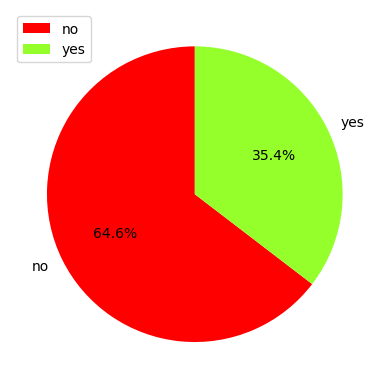

In [9]:
rec = df.groupby('Recommended')['reviews'].count().reset_index()
mycolors = ["r", "#94ff2b"]

plt.pie(rec['reviews'], labels = rec['Recommended'],autopct='%1.1f%%',colors = mycolors, startangle=90)
plt.legend()
plt.show()

### Sentiment Analysis

In [10]:
#remove punctuation
df['reviews'] = df['reviews'].str.replace('[^\w\s]','')

# tokenize
print(df.iloc[1,1])
df['reviews'] = df.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df.iloc[0,1])

#Removing stopwords
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df.head(20))

#Calculate polarity to gather sentiment tags.
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    

    
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
    
df['polarity'] = df['reviews'].apply(polarity_calc)


df['tag'] = df['polarity'].apply(tag_cal)


print(df)

C:\Users\kater\AppData\Local\Temp\ipykernel_2916\2079851520.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('[^\w\s]','')


Economy Class
Economy Class
   Type Of Traveller        Seat Type  \
0       Solo Leisure    Economy Class   
1       Solo Leisure    Economy Class   
2       Solo Leisure    Economy Class   
3     Family Leisure    Economy Class   
4     Couple Leisure    Economy Class   
5     Family Leisure   Business Class   
6     Couple Leisure    Economy Class   
7     Couple Leisure   Business Class   
8     Couple Leisure   Business Class   
9     Couple Leisure   Business Class   
10    Couple Leisure   Business Class   
11      Solo Leisure    Economy Class   
12    Couple Leisure  Premium Economy   
13      Solo Leisure   Business Class   
14    Couple Leisure    Economy Class   
15    Couple Leisure    Economy Class   
16    Family Leisure    Economy Class   
17    Family Leisure   Business Class   
18    Family Leisure    Economy Class   
19    Family Leisure    Economy Class   

                                                Route     Date Flown  \
0                        Cochin to Auc

In [11]:
#The percentage of various types of tags
(df.groupby('tag').size()/df['tag'].count())*100

tag
Negative    31.1
Neutral      1.0
Positive    67.9
dtype: float64

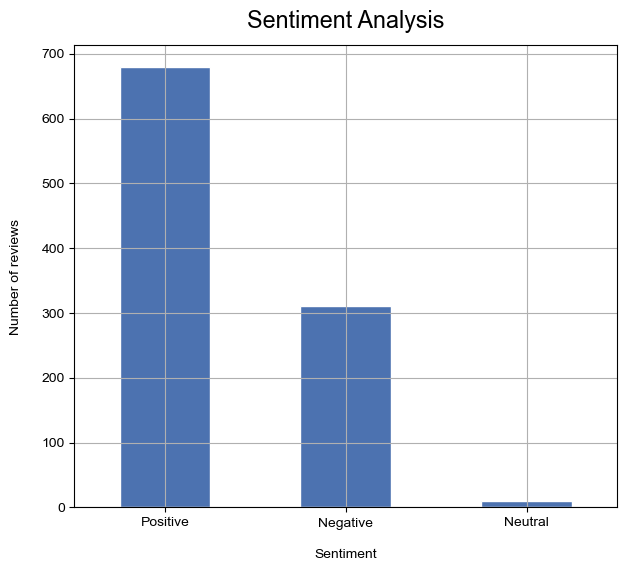

In [12]:
df['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("Number of reviews", labelpad=14)
plt.title("Sentiment Analysis", y=1.02);

### Visualizing the sentiments

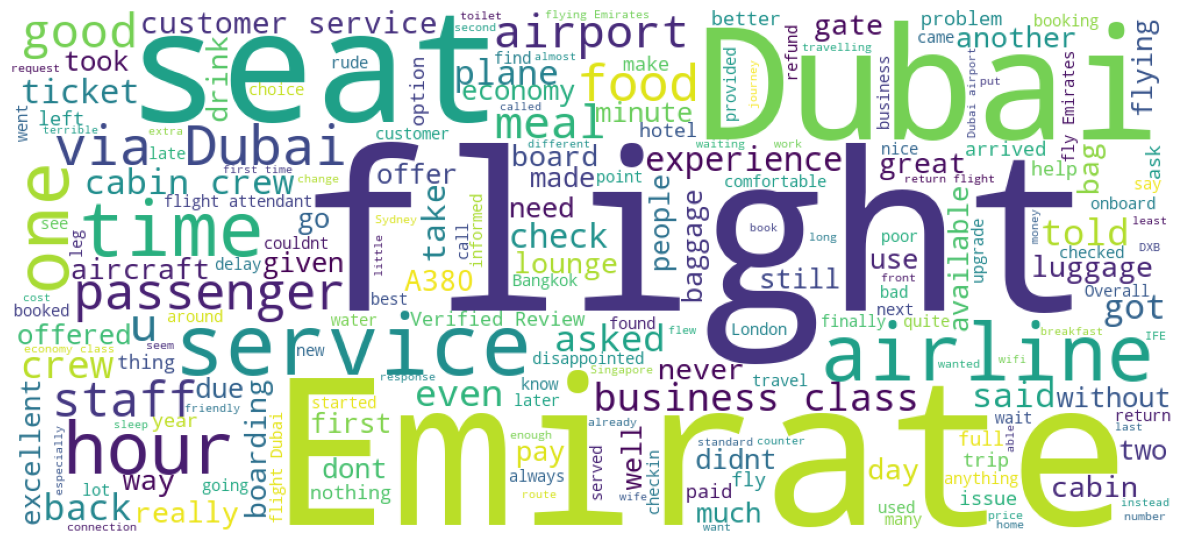

In [13]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

### Positive sentiments

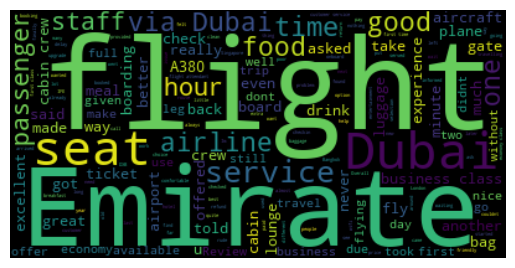

In [14]:
text = " "
for ind in df.index:
    if df['tag'][ind] == "Positive":
        text = text + df['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative sentiments

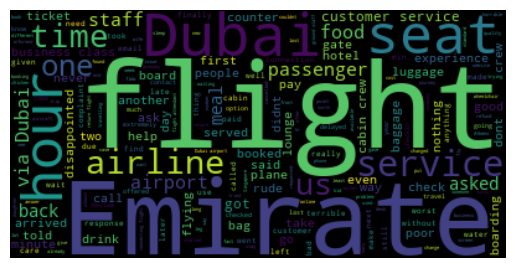

In [15]:
text2= " "        
for ind in df.index:
    if df['tag'][ind] == "Negative":
        text2 = text2 + df['reviews'][ind]  
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

World Cloud allows us to see that the positively recognized are onbord service, lounge, food and drinks, as well as seat ontime departures and staff. 
At the same time most of negative reviews contain complains on seat, service,departures,customer service, food. 

This can be further researched by taking a look on specific cabins. 
The analysis allows to quickly recognize areas of developement.

In [26]:
from plotnine import *

In [27]:
### Distribution per Class of travel

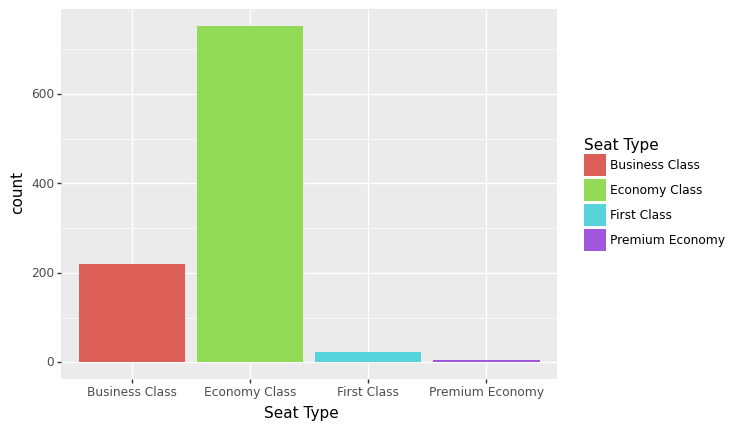

<ggplot: (85638879787)>

In [28]:
(ggplot(df)
+aes(x='Seat Type', fill="Seat Type")
+geom_bar())

In [18]:
### Customer satisfaction per class of travel

In [19]:
df_grouped_cabin = df.groupby(by=['Seat Type', 'Recommended'])
df_sum = df_grouped_cabin.sum()
print(df_sum)

                             Seat Comfort  Ground Service  Value For Money  \
Seat Type       Recommended                                                  
Business Class  no                  270.0           225.0              180   
                yes                 542.0           513.0              525   
Economy Class   no                 1171.0           917.0              942   
                yes                 863.0           868.0              905   
First Class     no                   23.0            11.0               12   
                yes                  75.0            66.0               68   
Premium Economy no                   13.0             7.0                6   
                yes                   3.0             5.0                4   

                             Cabin Staff Service  Food & Beverages  \
Seat Type       Recommended                                          
Business Class  no                         199.0             212.0   
         

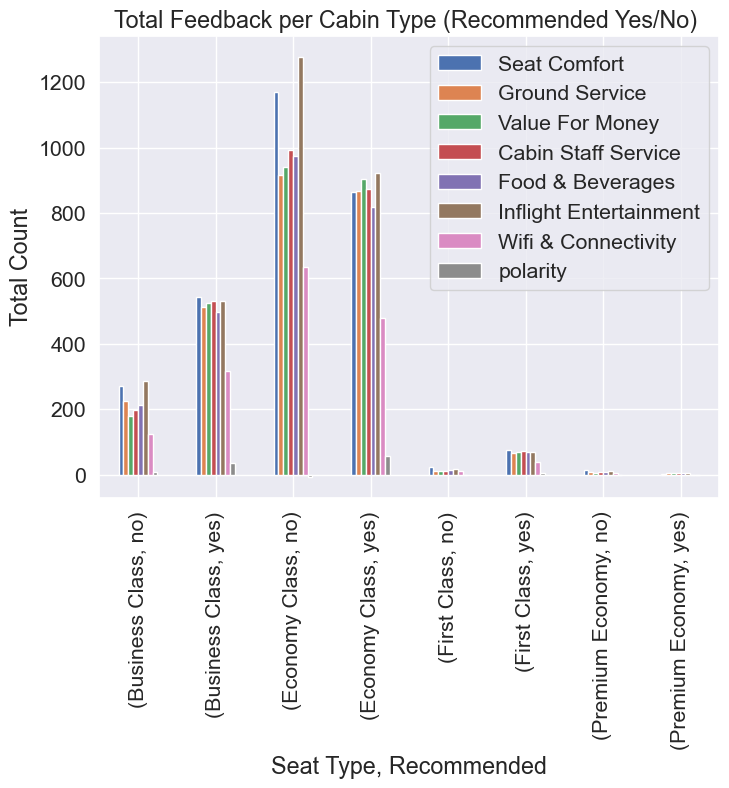

In [34]:
import matplotlib.pyplot as plt

df_grouped_cabin = df.groupby(by=['Seat Type', 'Recommended'])
df_sum = df_grouped_cabin.sum()

ax = df_sum.plot(kind='bar', figsize=(8, 6))
ax.set_xlabel('Seat Type, Recommended')
ax.set_ylabel('Total Count')
ax.set_title('Total Feedback per Cabin Type (Recommended Yes/No) ')

plt.show()


We can see spiking unsatisfaction in economy class with seat comfort and inflight entertainment 

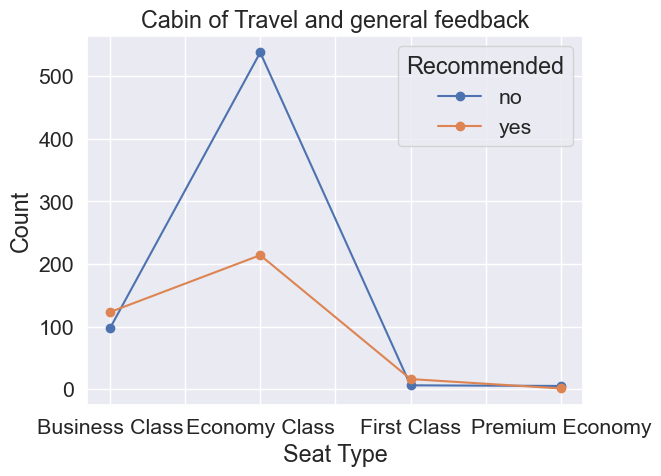

In [84]:
# Group the subset by "Seat Type" and "Recommended" and count the occurrences
df_grouped_cabin = df.groupby(by=['Seat Type', 'Recommended'])
df_sum = df_grouped_cabin.size().reset_index(name='Count')

# Pivot the data to have "Recommended" as columns and "Seat Type" as rows
pivoted = df_sum.pivot(index='Seat Type', columns='Recommended', values='Count')

# Plot the line chart
pivoted.plot(kind='line', marker='o')

# Set the labels and title
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.title('Cabin of Travel and general feedback')

# Show the plot
plt.show()


# Choice of cabin and Type of Traveler


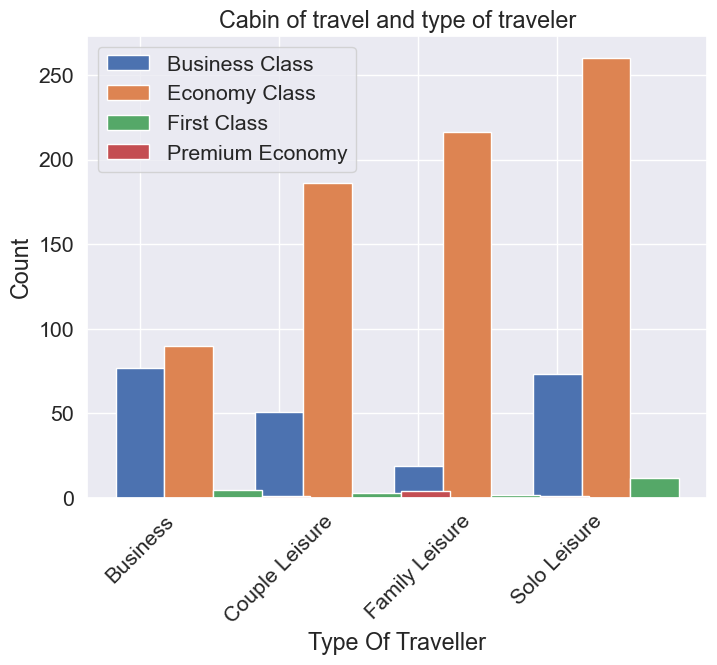

In [45]:
import matplotlib.pyplot as plt
import numpy as np

df_grouped = df.groupby(by=['Type Of Traveller', 'Seat Type']).size().unstack()

fig, ax = plt.subplots(figsize=(8, 6))

# Get the number of seat types and calculate the width for each group
num_seat_types = len(df_grouped.columns)
bar_width = 0.35

# Create an array of evenly spaced x values for each group
x = np.arange(len(df_grouped.index))

# Plot each group of bars
for i, seat_type in enumerate(df_grouped.columns):
    ax.bar(x + i * bar_width, df_grouped[seat_type], width=bar_width, label=seat_type)

# Set the x-axis labels to be the type of travel categories
ax.set_xticks(x)
ax.set_xticklabels(df_grouped.index, rotation=45)
ax.set_xlabel('Type Of Traveller')
ax.set_ylabel('Count')
ax.set_title('Cabin of travel and type of traveler')
ax.legend()

plt.show()


The most Couple, Family and Solo travelers are choosing economy as cabin of traveling. Business travelers are almost evenly distributed between business and economy class.

In [75]:
#clean yo represent only boing or a380

# Drop rows with missing values (NaN)
df_cleaned = df.dropna(subset=['Aircraft'])

# Remove space in the "Aircraft" column
df_cleaned['Aircraft'] = df_cleaned['Aircraft'].str.replace(' ', '')

# Drop rows with specific values in the "Aircraft" column
values_to_drop = ['A388 / Boeing', 'A388, Boeing', '1 x Boeing']
df_cleaned = df_cleaned[~df_cleaned['Aircraft'].isin(values_to_drop)]

# Change values containing '777' to 'Boeing'
df_cleaned.loc[df_cleaned['Aircraft'].str.contains('777'), 'Aircraft'] = 'Boeing'

# Clean the "Aircraft" column by replacing variations with "Boeing" or "A380"
df_cleaned['Aircraft'] = df_cleaned['Aircraft'].replace('.*Boeing.*', 'Boeing', regex=True)
df_cleaned['Aircraft'] = df_cleaned['Aircraft'].replace('.*A380.*', 'A380', regex=True)

# Print the value counts of each category in the "Aircraft" column
print(df_cleaned['Aircraft'].value_counts())

A380        321
Boeing      294
A388          4
A340          2
BOEIN         1
?             1
BUS780        1
Emirates      1
EK203         1
Name: Aircraft, dtype: int64


C:\Users\kater\AppData\Local\Temp\ipykernel_2916\958755144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [77]:
# Create a subset that captures only "A380" and "Boeing" categories in the "Aircraft" column
subset = df_cleaned[df_cleaned['Aircraft'].isin(['A380', 'Boeing'])]

### Reviews and aircraft flown

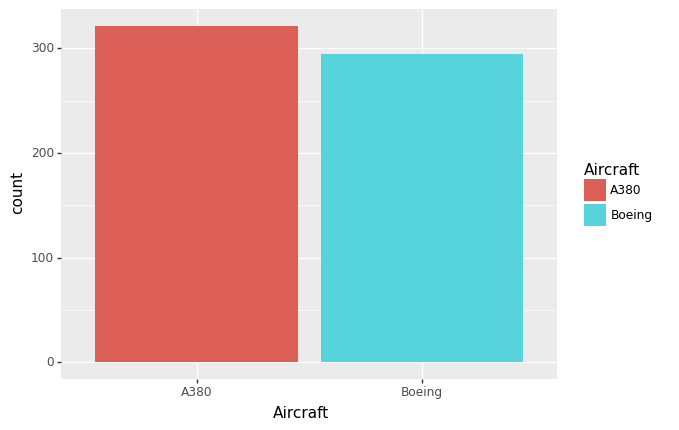

<ggplot: (85639289462)>

In [78]:
# Count the number of occurrences of each aircraft
(ggplot(subset)
+aes(x='Aircraft', fill="Aircraft")
+geom_bar())

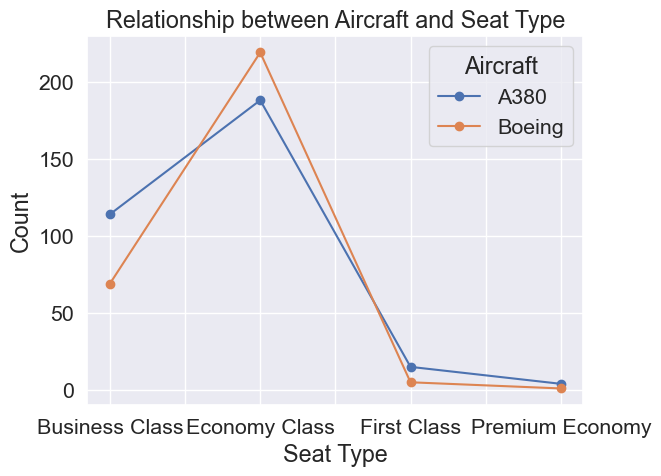

In [81]:
# Create a subset that captures only "A380" and "Boeing" categories in the "Aircraft" column
subset = df_cleaned[df_cleaned['Aircraft'].isin(['A380', 'Boeing'])]

# Group the subset by "Aircraft" and "Seat Type" and count the occurrences
grouped = subset.groupby(['Aircraft', 'Seat Type']).size().reset_index(name='Count')

# Pivot the data to have "Aircraft" as columns and "Seat Type" as rows
pivoted = grouped.pivot(index='Seat Type', columns='Aircraft', values='Count')

# Plot the line chart
pivoted.plot(kind='line', marker='o')

# Set the labels and title
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.title('Relationship between Aircraft and Seat Type')

# Show the plot
plt.show()
